In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import TargetEncoder

In [3]:
data = pd.read_csv(r"C:\Users\archana\OneDrive\Desktop\car_price_prediction.csv")

In [4]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
data.drop(columns= ["ID","Doors"],inplace=True)

In [6]:
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2


In [7]:
data.Levy  = data.Levy.replace("-",np.nan)

In [8]:
data.Levy = pd.to_numeric(data.Levy)
data.Levy = data.Levy.fillna(value=int(data.Levy.mean())).astype(int)

In [9]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [10]:
data["Mileage"] = data["Mileage"].str.replace(" km", "")
data["Mileage"] = pd.to_numeric(data["Mileage"])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  int32  
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  int64  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Airbags           19237 non-null  int64  
dtypes: float64(1), int32(1), int64(4), objec

In [12]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [13]:
data["Engine volume"] = data["Engine volume"].str.replace("Turbo", "")
data["Engine volume"] = pd.to_numeric(data["Engine volume"])

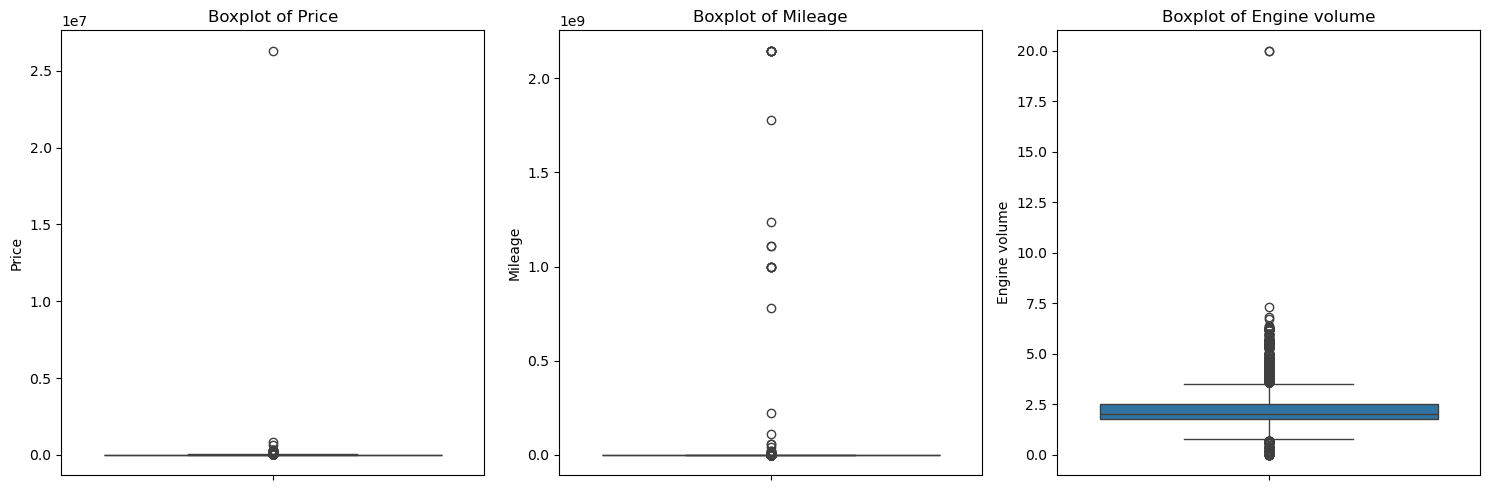

In [14]:
columns_to_plot = ['Price', 'Mileage', 'Engine volume']

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot):
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [15]:
data.Price.skew()

136.47042654268714

In [16]:
data.duplicated().sum()

3512

In [17]:
data.Price.skew()

136.47042654268714

In [18]:
data["Price_log"] = np.log1p(data["Price"])
print(data["Price_log"].skew())

-1.3757413681328308


<Axes: ylabel='Price_log'>

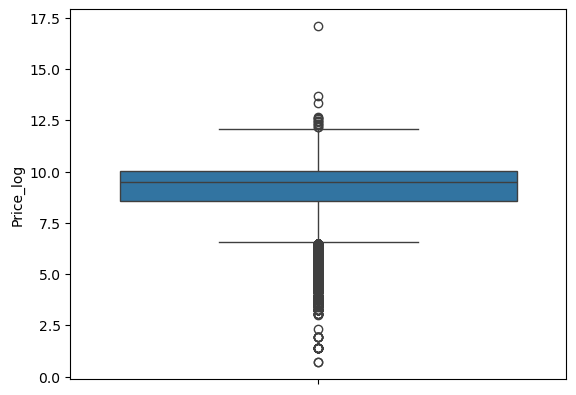

In [19]:
sns.boxplot(y=data["Price_log"])

In [20]:
Q1 = data["Price_log"].quantile(0.25)
Q3 = data["Price_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = data[(data["Price_log"] >= lower_bound) & (data["Price_log"] <= upper_bound)]

In [21]:
data.shape , df_clean.shape

((19237, 17), (17177, 17))

<Axes: ylabel='Price_log'>

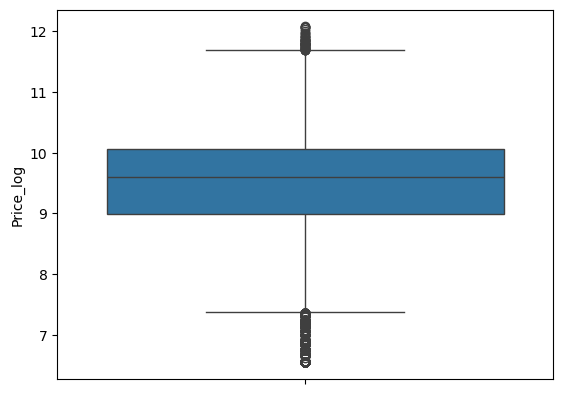

In [22]:
sns.boxplot(y=df_clean["Price_log"])

<Axes: >

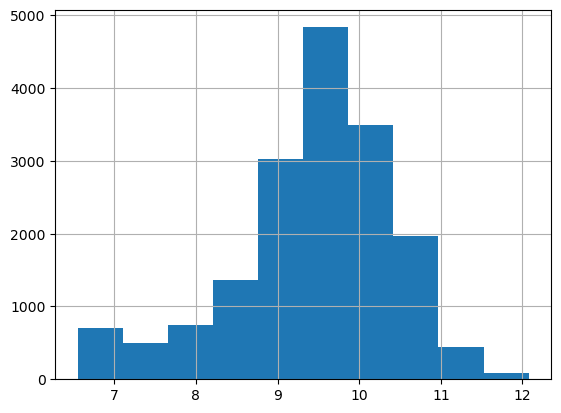

In [23]:
df_clean["Price_log"].hist()

<Axes: ylabel='Mileage'>

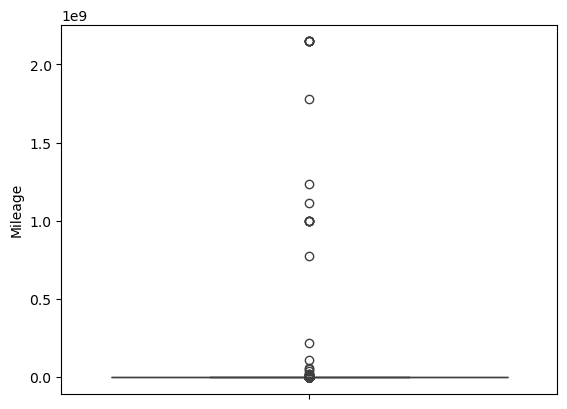

In [24]:
sns.boxplot(y=df_clean["Mileage"])

In [25]:
df_clean["Mileage"].skew()

39.26331937932291

In [26]:
df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])

C:\Users\archana\AppData\Local\Temp\ipykernel_23588\3502538242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Mileage_log"] = np.log1p(df_clean["Mileage"])


In [27]:
df_clean["Mileage_log"].skew()

-3.7692943689161664

<Axes: ylabel='Mileage_log'>

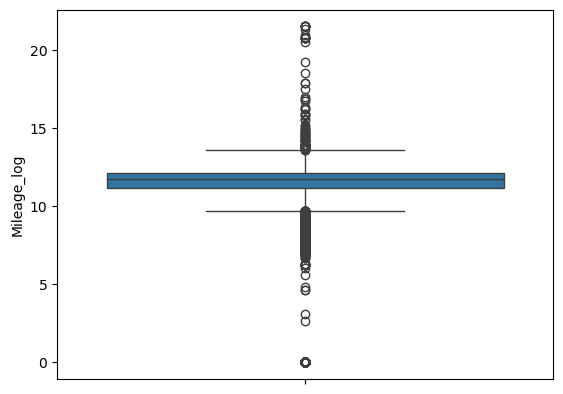

In [28]:
sns.boxplot(y=df_clean["Mileage_log"])

In [29]:
df_clean.shape

(17177, 18)

In [30]:
Q1 = df_clean["Mileage_log"].quantile(0.25)
Q3 = df_clean["Mileage_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Mileage_log"] >= lower_bound) & (df_clean["Mileage_log"] <= upper_bound)]

In [31]:
df_clean.shape

(15796, 18)

<Axes: ylabel='Mileage_log'>

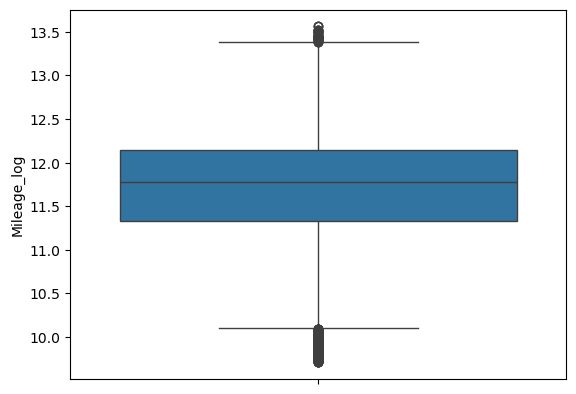

In [32]:
sns.boxplot(y=df_clean["Mileage_log"])

In [33]:
df_clean.Mileage_log.skew()

-0.5021797779020178

<Axes: ylabel='Engine volume'>

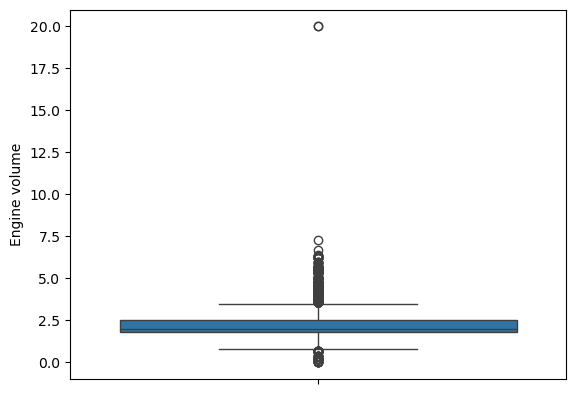

In [34]:
sns.boxplot(y=df_clean["Engine volume"])

In [35]:
df_clean["Engine volume"].skew()

2.493412208592941

In [36]:
df_clean["Volume_log"] = np.log1p(df_clean["Engine volume"])

In [37]:
df_clean["Volume_log"].skew()

0.7438234269064881

<Axes: ylabel='Volume_log'>

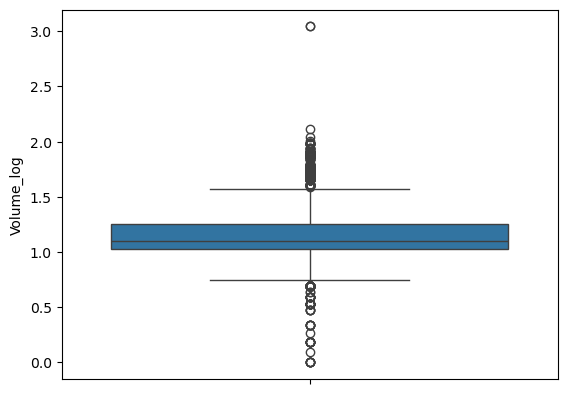

In [38]:
sns.boxplot(y=df_clean["Volume_log"])

In [39]:
df_clean.shape

(15796, 19)

In [40]:
Q1 = df_clean["Volume_log"].quantile(0.25)
Q3 = df_clean["Volume_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean["Volume_log"] >= lower_bound) & (df_clean["Volume_log"] <= upper_bound)]

In [41]:
df_clean.shape

(14832, 19)

<Axes: ylabel='Volume_log'>

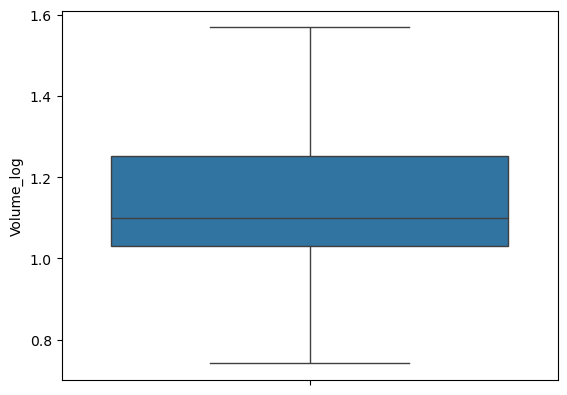

In [42]:
sns.boxplot(y=df_clean["Volume_log"])

In [43]:
df_clean.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


In [44]:
data = df_clean.drop(columns=["Model","Price","Mileage","Engine volume"])

In [45]:
data.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909
3,862,FORD,2011,Jeep,Yes,Hybrid,4.0,Automatic,4x4,Left wheel,White,0,8.190909,12.037459,1.252763
4,446,HONDA,2014,Hatchback,Yes,Petrol,4.0,Automatic,Front,Left wheel,Silver,4,9.369649,11.428478,0.832909


<Axes: xlabel='count', ylabel='Manufacturer'>

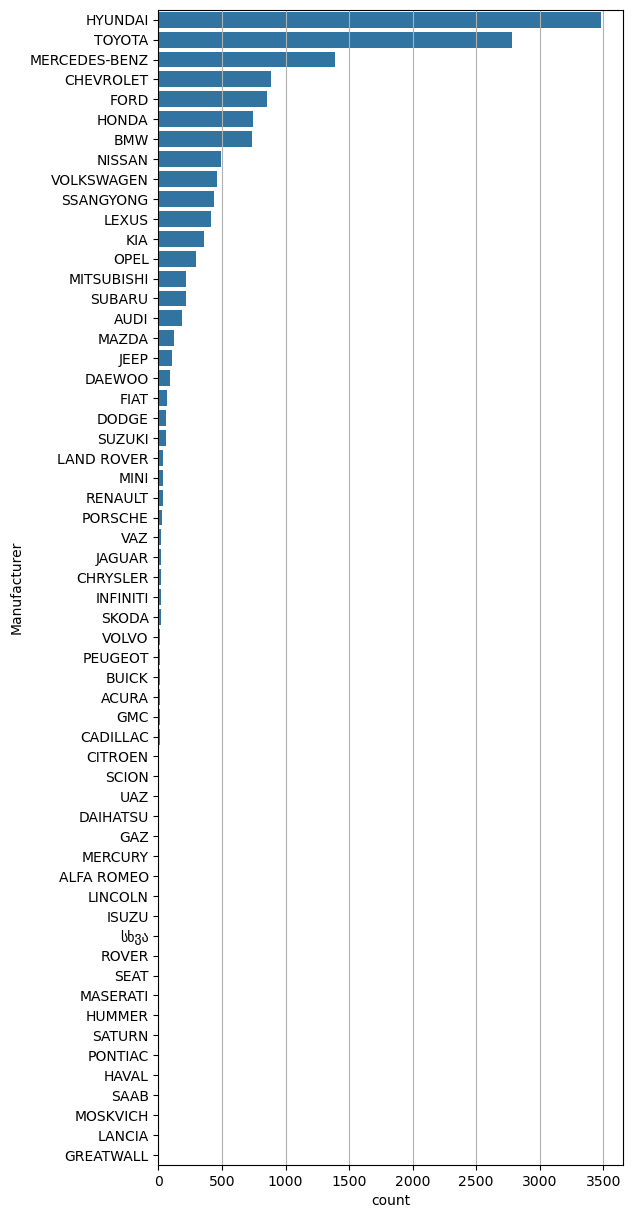

In [46]:
plt.figure(figsize=(6, 15))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [47]:
rare = data.Manufacturer.value_counts()

In [48]:
Others =  list(dict(rare[rare < 50]).keys())
data.Manufacturer = data.Manufacturer.apply(lambda x: "Others" if x in Others else x)

In [49]:
data.Manufacturer.value_counts()

Manufacturer
HYUNDAI          3484
TOYOTA           2778
MERCEDES-BENZ    1392
CHEVROLET         885
FORD              857
HONDA             744
BMW               735
NISSAN            495
VOLKSWAGEN        461
SSANGYONG         436
LEXUS             410
Others            369
KIA               358
OPEL              295
MITSUBISHI        220
SUBARU            219
AUDI              188
MAZDA             123
JEEP              108
DAEWOO             90
FIAT               67
DODGE              62
SUZUKI             56
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Manufacturer'>

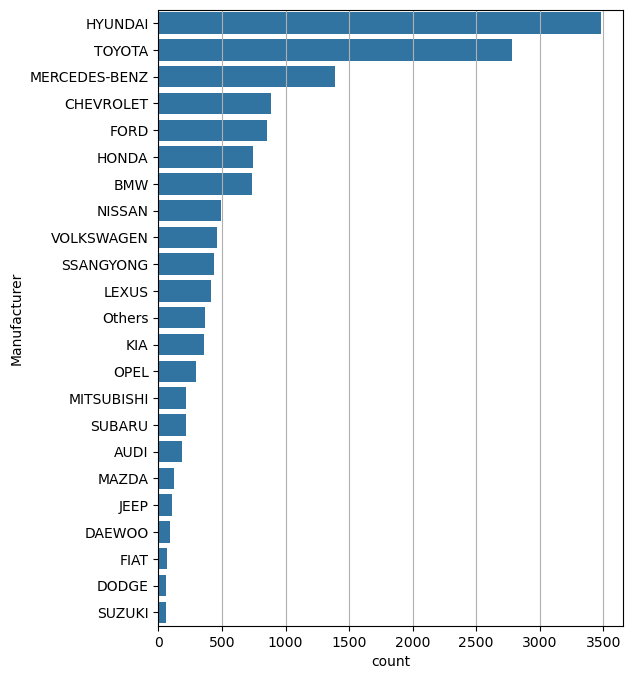

In [50]:
plt.figure(figsize=(6, 8))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [51]:
data.head(3)

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1399,LEXUS,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,Left wheel,Silver,12,9.497697,12.133534,1.504077
1,1018,CHEVROLET,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,Left wheel,Black,8,9.718482,12.165256,1.386294
2,906,HONDA,2006,Hatchback,No,Petrol,4.0,Variator,Front,Right-hand drive,Black,2,9.044050,12.206078,0.832909


In [52]:
data["Prod. year"].value_counts()

Prod. year
2014    1764
2012    1664
2013    1601
2015    1284
2016    1270
2011    1260
2010    1151
2017     735
2008     524
2009     502
2007     365
2018     343
2005     276
2004     259
2003     258
2002     226
2006     225
2000     198
2001     187
1998     149
1999     138
2019     102
1997     100
1996      78
1995      66
1994      28
1992      17
1993      13
1990       9
2020       8
1988       6
1989       4
1984       4
1991       4
1987       4
1978       2
1980       1
1977       1
1981       1
1964       1
1985       1
1986       1
1943       1
1953       1
Name: count, dtype: int64

In [53]:
scaler = StandardScaler()
data["Levy"] = scaler.fit_transform(data[["Levy"]])
data["Prod. year"] = scaler.fit_transform(data[["Prod. year"]])
data["Cylinders"] = scaler.fit_transform(data[["Cylinders"]])
data["Airbags"] = scaler.fit_transform(data[["Airbags"]])
data["Volume_log"] = scaler.fit_transform(data[["Volume_log"]])
data["Mileage_log"] = scaler.fit_transform(data[["Mileage_log"]])
data["Price_log"] = scaler.fit_transform(data[["Price_log"]])

In [54]:
data.head()

,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Price_log,Mileage_log,Volume_log
0,1.813620,LEXUS,-0.220682,Jeep,Yes,Hybrid,1.848689,Automatic,4x4,Left wheel,Silver,1.360912,0.036892,0.658110,2.036691
1,0.526612,CHEVROLET,-0.027142,Jeep,No,Petrol,1.848689,Tiptronic,4x4,Left wheel,Black,0.375085,0.265904,0.705880,1.386627
2,0.148279,HONDA,-0.994844,Hatchback,No,Petrol,-0.425960,Variator,Front,Right-hand drive,Black,-1.103654,-0.433660,0.767356,-1.667597
3,-0.000352,FORD,-0.027142,Jeep,Yes,Hybrid,-0.425960,Automatic,4x4,Left wheel,White,-1.596568,-1.318591,0.513425,0.649645
4,-1.405590,HONDA,0.553480,Hatchback,Yes,Petrol,-0.425960,Automatic,Front,Left wheel,Silver,-0.610741,-0.095928,-0.403665,-1.667597


In [55]:
data.columns

Index(['Levy', 'Manufacturer', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel',
       'Color', 'Airbags', 'Price_log', 'Mileage_log', 'Volume_log'],
      dtype='object')